<a href="https://colab.research.google.com/github/Hanisheba/IOT_Repo/blob/main/LabWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/cars.csv')


In [ ]:
df=df.iloc[:,2:]
df

,fuel,owner,selling_price
0,Diesel,First Owner,450000
1,Diesel,Second Owner,370000
2,Petrol,Third Owner,158000
3,Diesel,First Owner,225000
4,Petrol,First Owner,130000
...,...,...,...
8123,Petrol,First Owner,320000
8124,Diesel,Fourth & Above Owner,135000
8125,Diesel,First Owner,382000
8126,Diesel,First Owner,290000


In [ ]:
df.sample(5)

,fuel,owner,selling_price
2992,Petrol,First Owner,225000
6609,Petrol,First Owner,500000
6526,Diesel,First Owner,610000
1918,Diesel,First Owner,175000
7891,Diesel,Third Owner,320000


In [ ]:
Scaling

In [ ]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
scaler.mean_

array([0.4737004 , 0.45970471, 0.00047757])

In [ ]:
X_train

,fuel,owner,selling_price_zscore
6518,1.0,0.0,-0.146693
6144,1.0,1.0,-0.419560
6381,0.0,3.0,-0.320336
438,0.0,1.0,-0.134290
5939,1.0,0.0,-0.376149
...,...,...,...
5226,0.0,0.0,-0.202507
5390,0.0,1.0,-0.134290
860,1.0,0.0,-0.077236
7603,0.0,0.0,0.163383


In [ ]:
X_train_scaled

array([[ 0.95882422, -0.63807134, -0.14733635],
       [ 0.95882422,  0.74993128, -0.42051059],
       [-0.86299784,  3.52593652, -0.3211745 ],
       ...,
       [ 0.95882422, -0.63807134, -0.07780108],
       [-0.86299784, -0.63807134,  0.16308893],
       [ 0.95882422,  0.74993128, -0.60055725]])

In [ ]:
np.round(X_train_scaled, 1)

array([[ 1. , -0.6, -0.1],
       [ 1. ,  0.7, -0.4],
       [-0.9,  3.5, -0.3],
       ...,
       [ 1. , -0.6, -0.1],
       [-0.9, -0.6,  0.2],
       [ 1. ,  0.7, -0.6]])

In [ ]:
X_train_scaled.dtype

dtype('float64')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

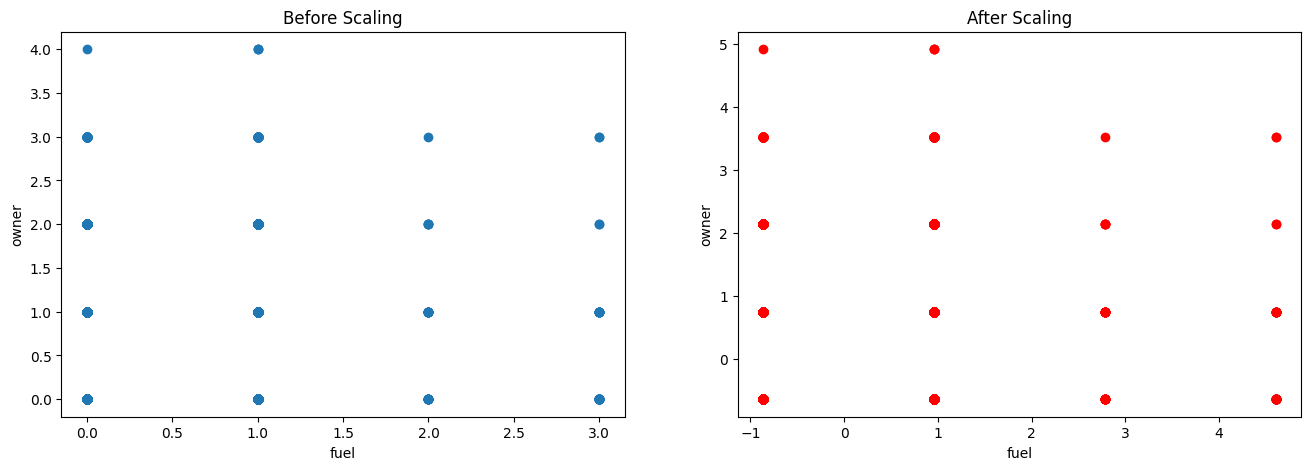

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['fuel'], X_train['owner'])
plt.xlabel('fuel')
plt.ylabel('owner')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['fuel'], X_train_scaled['owner'],color='red')
plt.xlabel('fuel')
plt.ylabel('owner')
plt.title('After Scaling')


plt.show()

In [ ]:
Outlier

In [ ]:
X= df.drop('selling_price', axis=1)
y= df['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 2), (2439, 2))

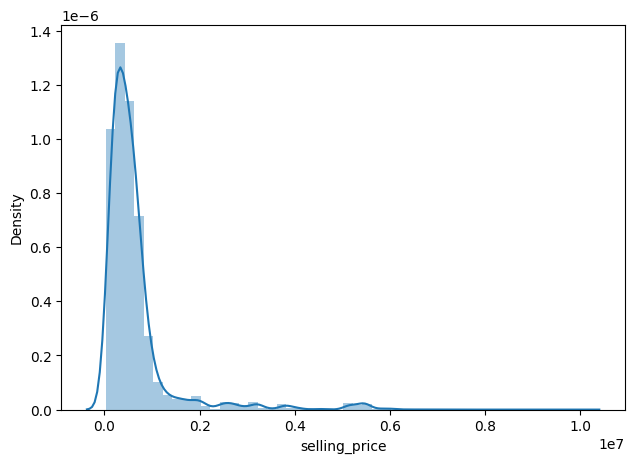

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['selling_price'])



plt.show()

In [ ]:
df['selling_price'].skew()

4.193533440675855

In [ ]:
print("Mean value of selling_price",df['selling_price'].mean())
print("Std value of selling_price",df['selling_price'].std())
print("Min value of selling_price",df['selling_price'].min())
print("Max value of selling_price",df['selling_price'].max())

Mean value of selling_price 638271.8077017716
Std value of selling_price 806253.4035082317
Min value of selling_price 29999
Max value of selling_price 10000000


In [ ]:
# z = (x- mean)/std

In [ ]:
# Finding the z score
df['selling_price_zscore'] = (df['selling_price'] - df['selling_price'].mean())/df['selling_price'].std()

In [ ]:
# Finding outlier
outlier = df[(df['selling_price_zscore'] > 3) | (df['selling_price_zscore'] < -3)]
outlier

,fuel,owner,selling_price,selling_price_zscore
131,Diesel,First Owner,3975000,4.138560
132,Petrol,First Owner,5150000,5.595918
133,Diesel,First Owner,3200000,3.177324
134,Petrol,First Owner,4100000,4.293598
135,Diesel,First Owner,4500000,4.789720
...,...,...,...,...
7860,Diesel,First Owner,3200000,3.177324
7862,Diesel,First Owner,3800000,3.921507
7872,Diesel,First Owner,5400000,5.905995
7873,Diesel,First Owner,5500000,6.030025


In [ ]:
new_df1 = df[(df['selling_price_zscore'] < 3 ) & (df['selling_price_zscore'] > -3)]
new_df1.shape

(7899, 4)

<Axes: >

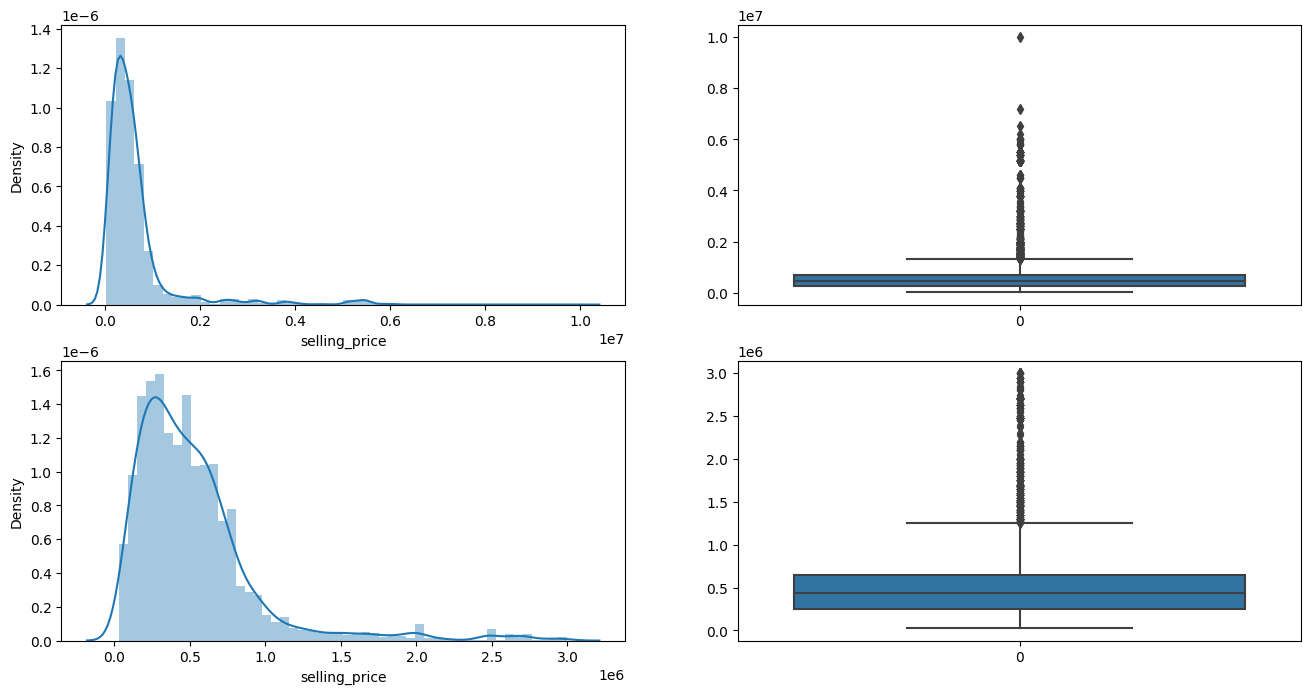

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])

plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])

plt.subplot(2,2,3)
sns.distplot(new_df1['selling_price'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['selling_price'])

In [ ]:
Encoding

In [ ]:
df[['fuel', 'owner']]

,fuel,owner
0,Diesel,First Owner
1,Diesel,Second Owner
2,Petrol,Third Owner
3,Diesel,First Owner
4,Petrol,First Owner
...,...,...
8123,Petrol,First Owner
8124,Diesel,Fourth & Above Owner
8125,Diesel,First Owner
8126,Diesel,First Owner


In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Diesel', 'Petrol', 'LPG', 'CNG'],['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['fuel', 'owner']]= oe.fit_transform(df[['fuel', 'owner']])

In [ ]:
oe.categories_

[array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object)]

In [ ]:
df[['fuel', 'owner']]

,fuel,owner
0,0.0,0.0
1,0.0,1.0
2,1.0,2.0
3,0.0,0.0
4,1.0,0.0
...,...,...
8123,1.0,0.0
8124,0.0,3.0
8125,0.0,0.0
8126,0.0,0.0


In [ ]:
df

,fuel,owner,selling_price,selling_price_zscore
0,0.0,0.0,450000,-0.233514
1,0.0,1.0,370000,-0.332739
2,1.0,2.0,158000,-0.595683
3,0.0,0.0,225000,-0.512583
4,1.0,0.0,130000,-0.630412
...,...,...,...,...
8123,1.0,0.0,320000,-0.394754
8124,0.0,3.0,135000,-0.624210
8125,0.0,0.0,382000,-0.317855
8126,0.0,0.0,290000,-0.431963


In [ ]:
Box-Cox transformation

In [ ]:
X = df.drop(columns=['selling_price'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

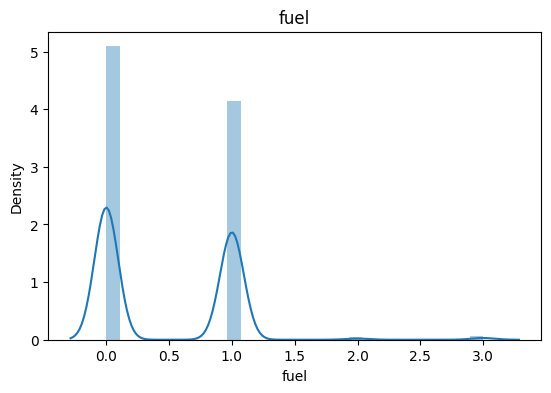

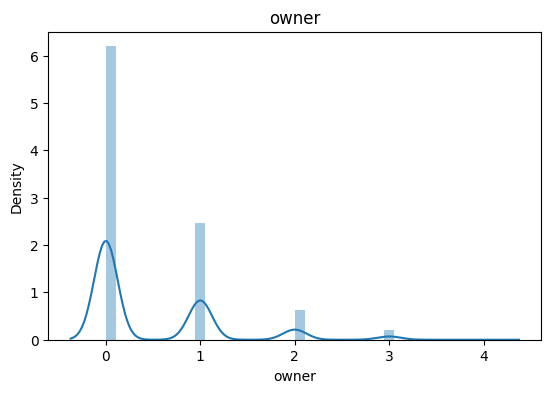

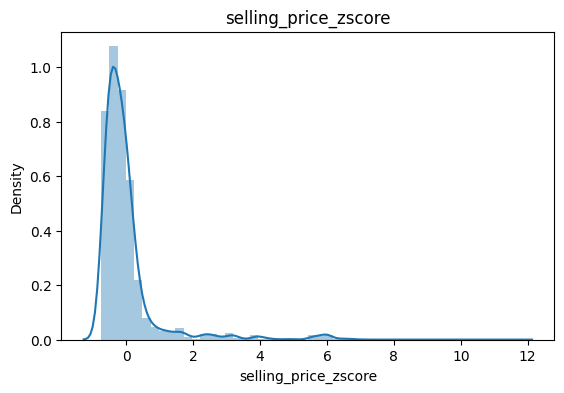

In [ ]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)


    plt.show()

In [ ]:
import numpy as np
import warnings
np.warnings = warnings

In [ ]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()


In [ ]:
Log transformation

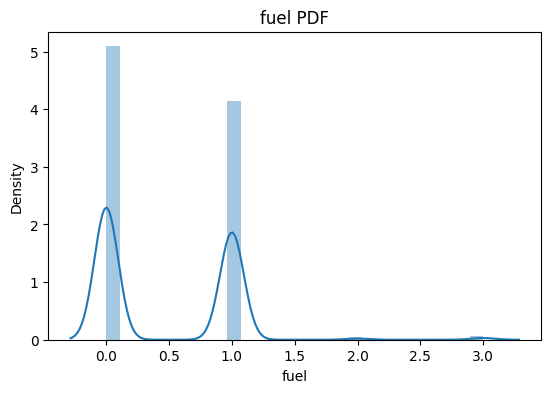

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fuel'])
plt.title('fuel PDF')


plt.show()

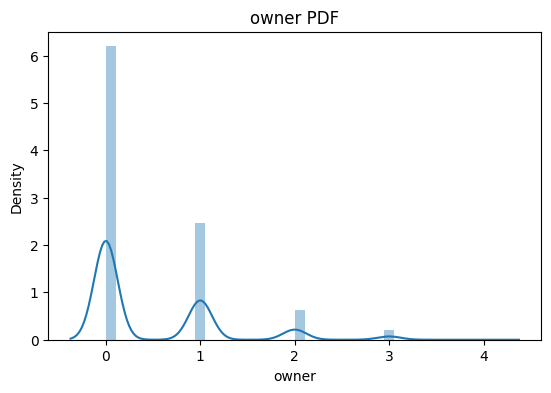

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('owner PDF')


plt.show()

In [ ]:
Null value handling

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X = df[['fuel', 'owner', 'selling_price']]

In [ ]:
#Replace null values with mean
imp1 = SimpleImputer(strategy='mean')
X[['selling_price']]= imp1.fit_transform(X[['selling_price']])
print(X[['selling_price']].isnull().sum())

selling_price    0
dtype: int64


In [ ]:
imp1.statistics_   #mean value

array([638271.80770177])

In [ ]:
X[['selling_price']].mean()

selling_price    638271.807702
dtype: float64

In [ ]:
X[['fuel']].isnull().sum()

fuel    0
dtype: int64

In [ ]:
##Replace null values with constant
imp2 = SimpleImputer(strategy='constant',fill_value=100)
X[['fuel']]= imp2.fit_transform(X[['fuel']])
print(X[['fuel']].isnull().sum())

fuel    0
dtype: int64


In [ ]:
imp2.statistics_   #constant value

array([100.])

In [ ]:
X = df[['fuel', 'owner', 'selling_price']]

In [ ]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='mean'),['selling_price']),
    ('imputer2',SimpleImputer(strategy='constant',fill_value=100),['fuel'])
],remainder='passthrough')

X_transformed = trf.fit_transform(X)
X_transformed = df = pd.DataFrame(X_transformed, columns = X.columns)

In [ ]:
X.isnull().sum()

fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
X_transformed.isnull().sum()

fuel             0
owner            0
selling_price    0
dtype: int64